# **Download the UCI Repo**

In [1]:
pip install ucimlrepo

# **Step1 Import Data Set**

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

# **Step 2 Data Prepration**

In [3]:
import pandas as pd


# Merge features and target into a single dataframe
df = pd.concat([X, y], axis=1)

df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


# **Step 3 EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


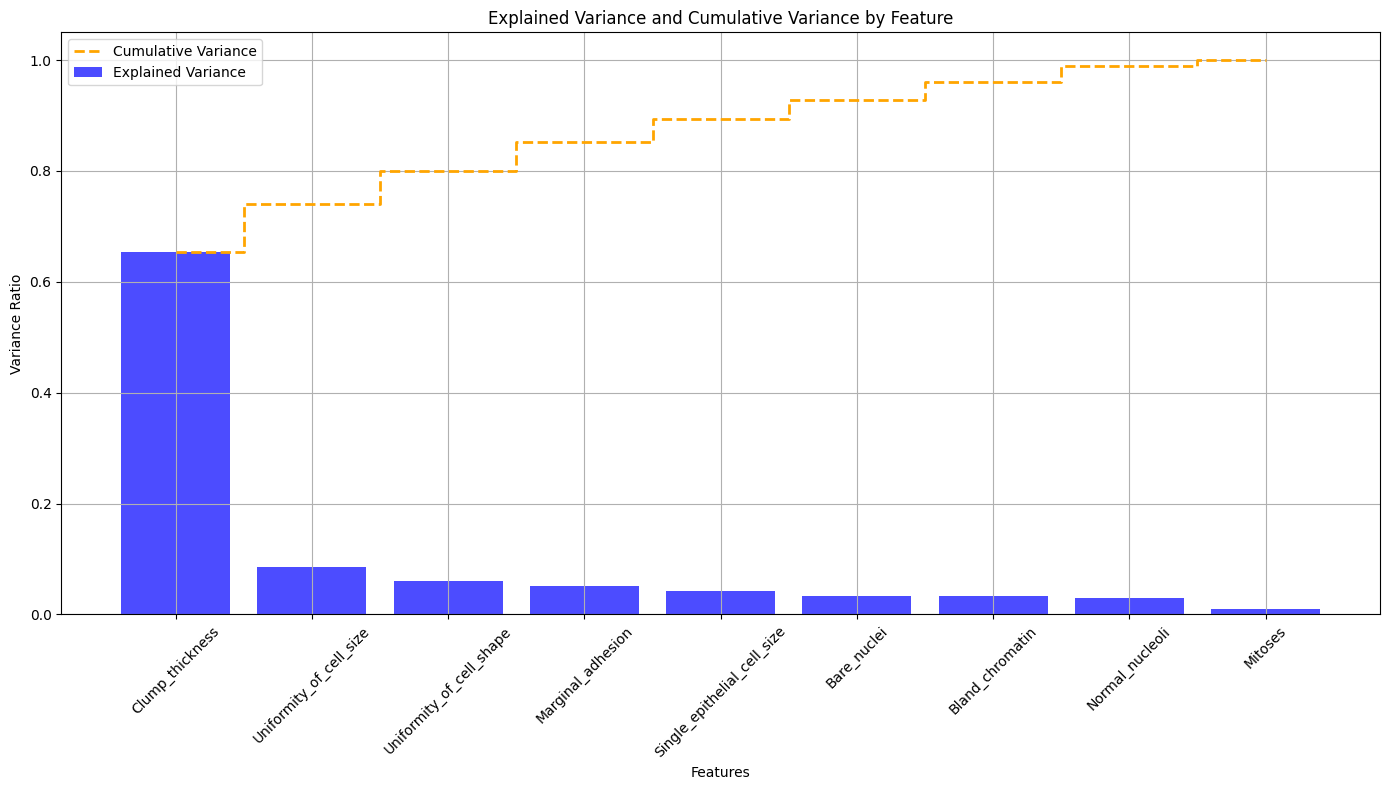

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features and target
features = df.drop(columns=['Class'])
target = df['Class']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(features_scaled)

# Compute explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance with feature names
plt.figure(figsize=(14, 8))
x_labels = features.columns  # Use feature names
plt.bar(x_labels, explained_variance, alpha=0.7, label='Explained Variance', color='blue')
plt.step(x_labels, cumulative_variance, where='mid', label='Cumulative Variance', color='orange', linestyle='--', linewidth=2)
# plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Features')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance and Cumulative Variance by Feature')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()



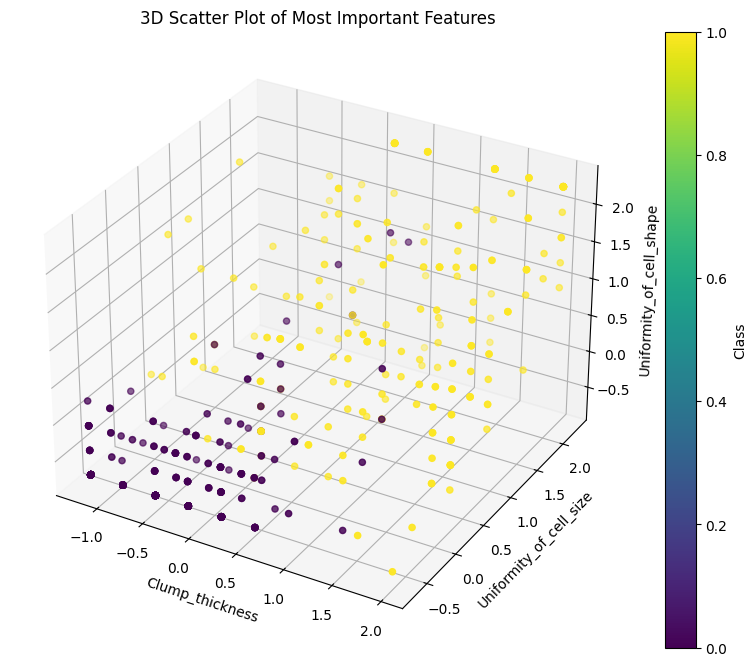

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

most_important_features = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on target variable
scatter = ax.scatter(features_scaled[:, features.columns.get_loc(most_important_features[0])],
                     features_scaled[:, features.columns.get_loc(most_important_features[1])],
                     features_scaled[:, features.columns.get_loc(most_important_features[2])],
                     c=target, cmap='viridis')

ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('3D Scatter Plot of Most Important Features')

# Add a colorbar
plt.colorbar(scatter, label='Class')


plt.show()

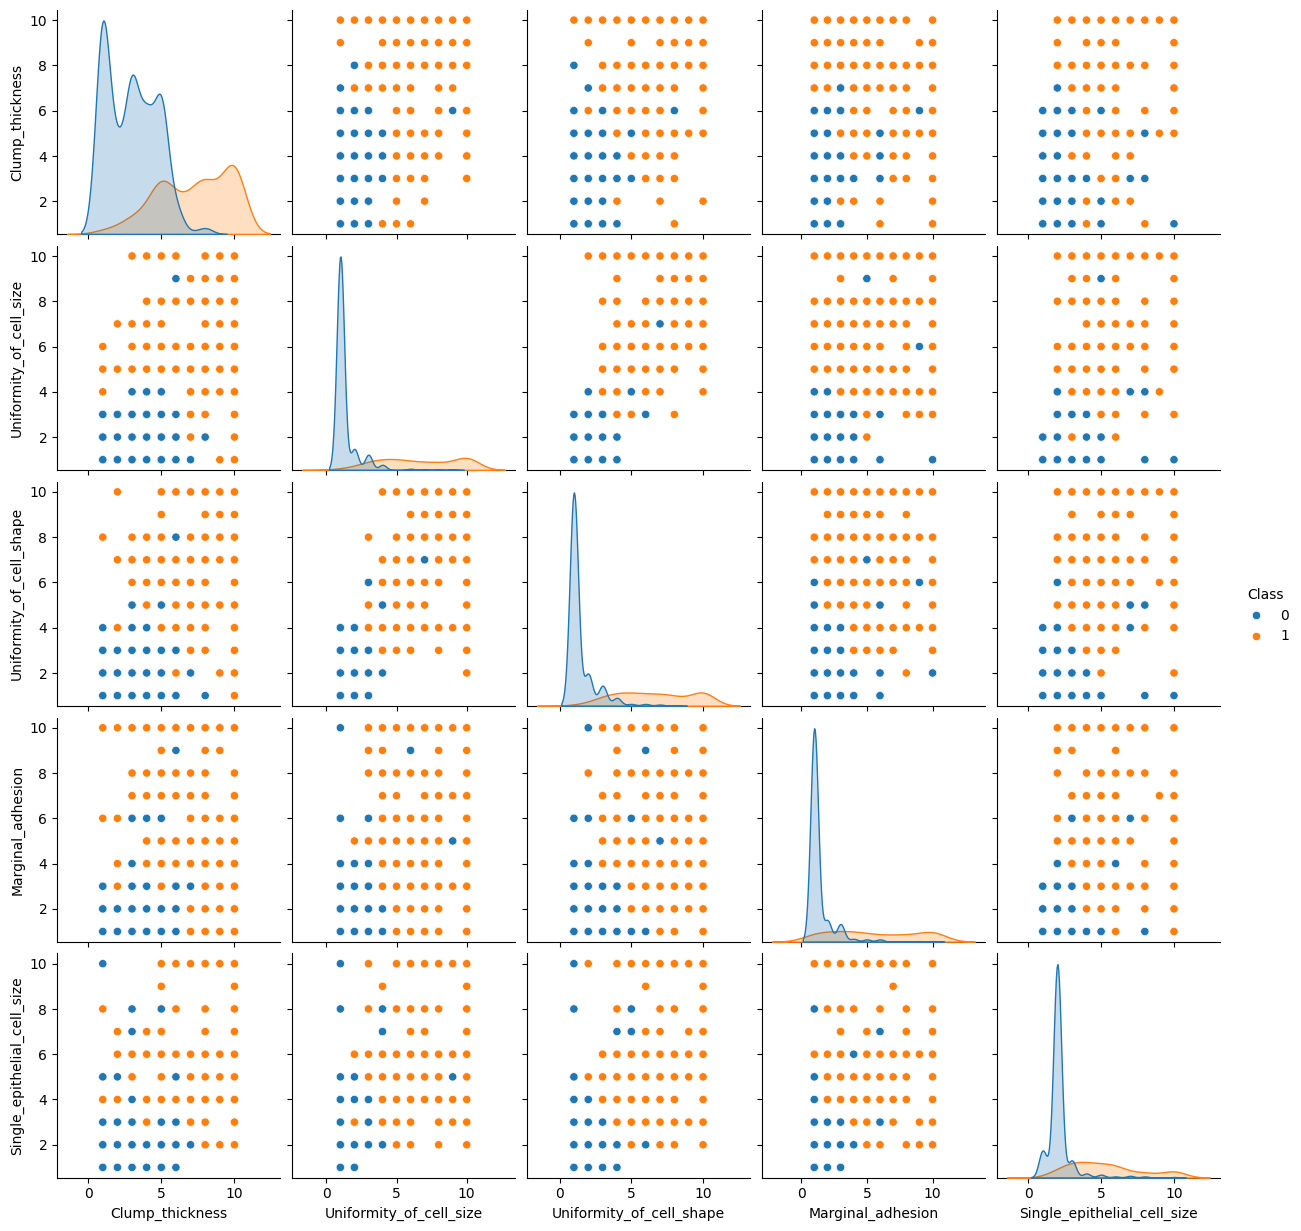

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Example (replace with your actual feature names)
most_important_features = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size']

# Create a pairplot for the selected features
sns.pairplot(df, vars=most_important_features, hue='Class')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

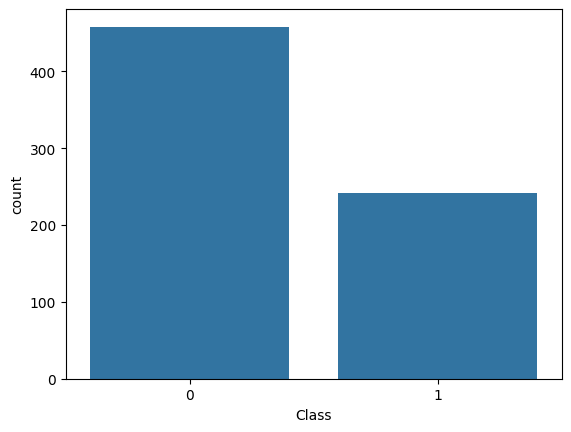

In [ ]:
import seaborn as sns
sns.countplot(x='Class', data=df)

<ipython-input-7-33d23b1a7e85>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


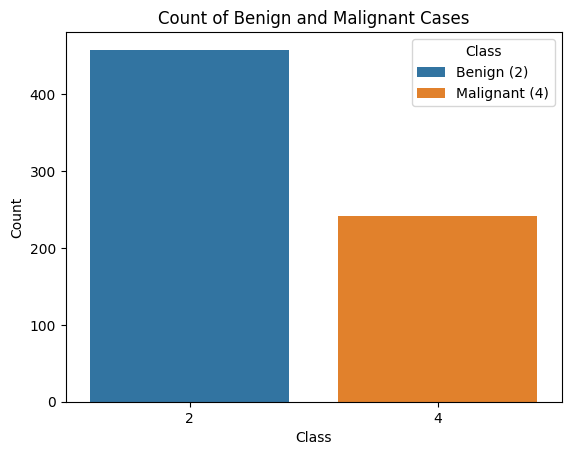

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for benign and malignant classes
colors = ['#1f77b4', '#ff7f0e']  # You can choose any colors you prefer

# Create count plot with specific colors
sns.countplot(x='Class', data=df, palette=colors)

# Add custom legend with colors
plt.legend(['Benign (2)', 'Malignant (4)'], title='Class', loc='upper right')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Benign and Malignant Cases')

plt.show()


#  **Step 4 Preprocessing**

In [11]:


# Fill missing values in the Bare_nuclei column with the median
df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)

<ipython-input-11-480e5359d712>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)


## **Label Encoding**

In [12]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Class' column
df['Class'] = label_encoder.fit_transform(df['Class'])

# Print the mapping between original and encoded values
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"Original Class: {original}, Encoded Value: {encoded}")

Original Class: 2, Encoded Value: 0
Original Class: 4, Encoded Value: 1


# **Step 5 Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df.drop(columns='Class')
y = df['Class']


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X_train.shape


(559, 9)

In [9]:
y_train.shape

(559,)

In [8]:
X_test.shape

(140, 9)

#  **Model implementation without Balancing**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## **Model Training**

In [ ]:
from sklearn.svm import NuSVC
models = {
    'Logistic Regression': LogisticRegression(C=0.01),  # High regularization, low iterations
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=10),  # Limited depth, high split min
    'Random Forest': RandomForestClassifier(n_estimators=5, max_depth=2),  # Fewer trees, limited depth
    'Support Vector Machine with Linear Kernal': SVC(kernel='linear', C=0.1),  # Linear kernel with high regularization
    'Support Vector Machine with polynomaial Kernal': SVC(kernel='poly', C=0.1),
    ' NuSVC': NuSVC(),

    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=20)  # High k value for excessive smoothing
}


## **Model Evalution**

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time


Logistic Regression Accuracy: 0.97
Logistic Regression Precision: 0.97
Logistic Regression Recall: 0.99
Logistic Regression F1-Score: 0.98
Logistic Regression ROC AUC: 1.00
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



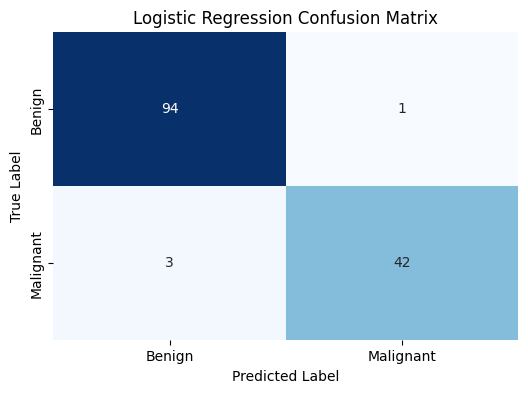

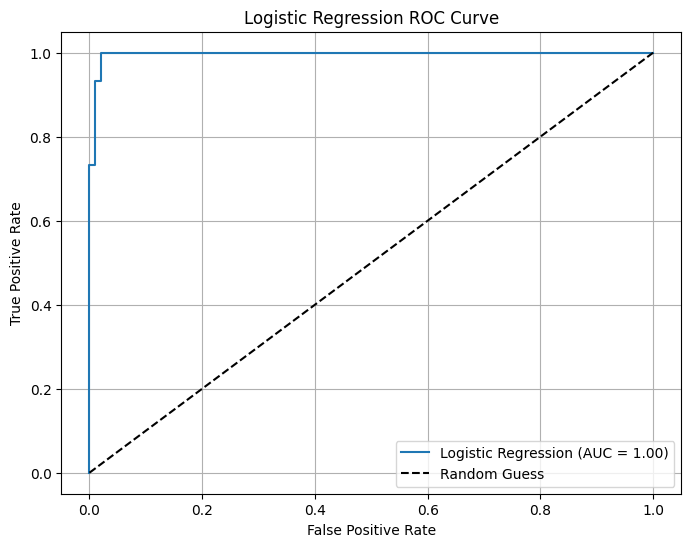

Logistic Regression Training Time: 0.01 seconds
Logistic Regression Testing Time: 0.00 seconds
Decision Tree Accuracy: 0.94
Decision Tree Precision: 0.96
Decision Tree Recall: 0.95
Decision Tree F1-Score: 0.95
Decision Tree ROC AUC: 0.94
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.89      0.91      0.90        45

    accuracy                           0.94       140
   macro avg       0.92      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



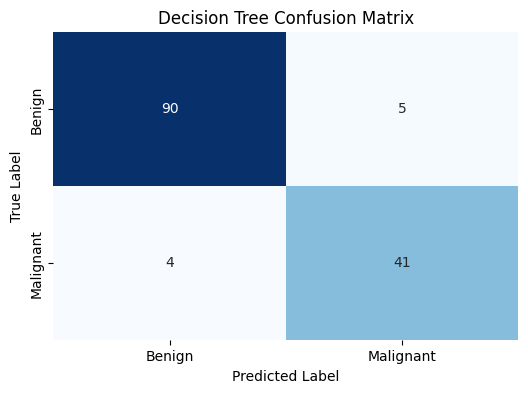

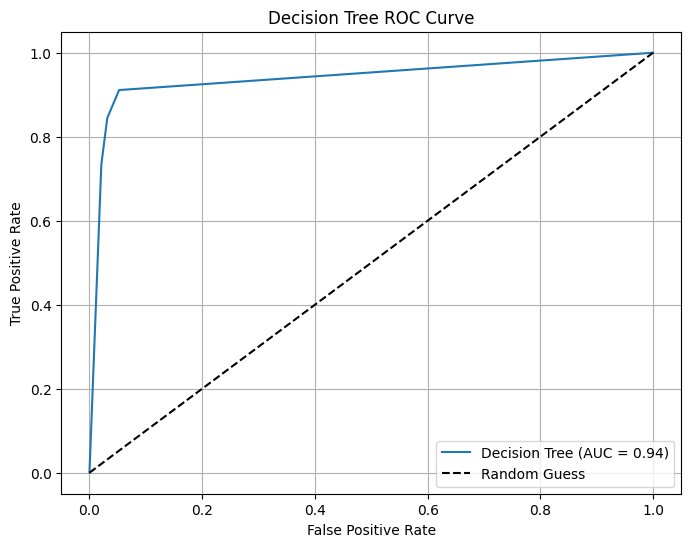

Decision Tree Training Time: 0.00 seconds
Decision Tree Testing Time: 0.00 seconds
Random Forest Accuracy: 0.95
Random Forest Precision: 0.95
Random Forest Recall: 0.98
Random Forest F1-Score: 0.96
Random Forest ROC AUC: 0.99
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.95      0.89      0.92        45

    accuracy                           0.95       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140



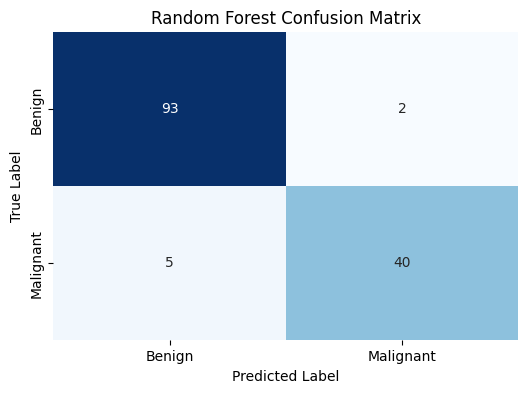

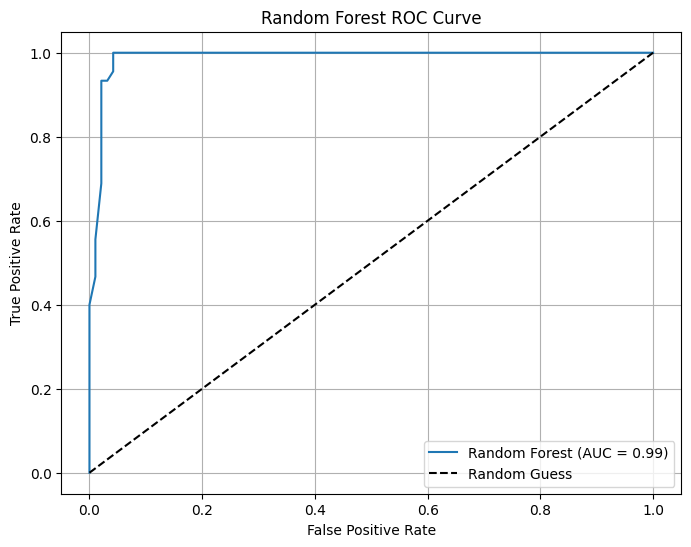

Random Forest Training Time: 0.02 seconds
Random Forest Testing Time: 0.00 seconds
Support Vector Machine with Linear Kernal Accuracy: 0.96
Support Vector Machine with Linear Kernal Precision: 0.96
Support Vector Machine with Linear Kernal Recall: 0.99
Support Vector Machine with Linear Kernal F1-Score: 0.97
Support Vector Machine with Linear Kernal ROC AUC: 1.00
Support Vector Machine with Linear Kernal Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



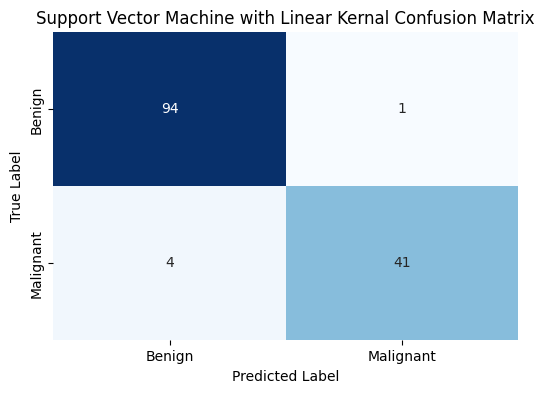

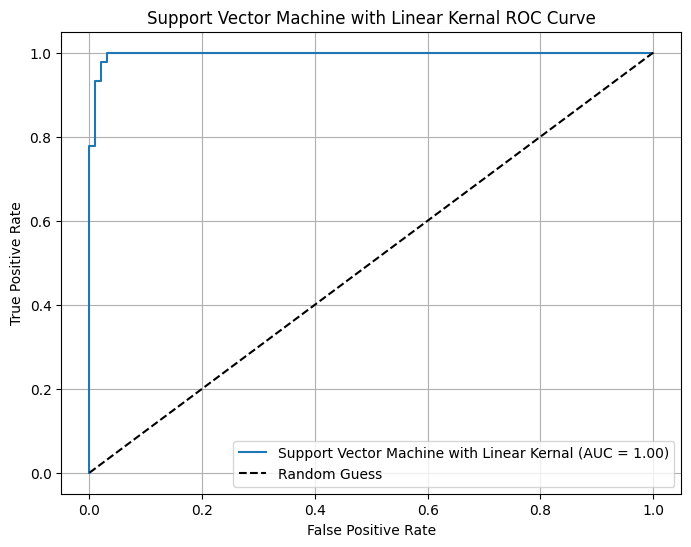

Support Vector Machine with Linear Kernal Training Time: 0.01 seconds
Support Vector Machine with Linear Kernal Testing Time: 0.00 seconds
Support Vector Machine with polynomaial Kernal Accuracy: 0.96
Support Vector Machine with polynomaial Kernal Precision: 0.95
Support Vector Machine with polynomaial Kernal Recall: 0.99
Support Vector Machine with polynomaial Kernal F1-Score: 0.97
Support Vector Machine with polynomaial Kernal ROC AUC: 1.00
Support Vector Machine with polynomaial Kernal Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140



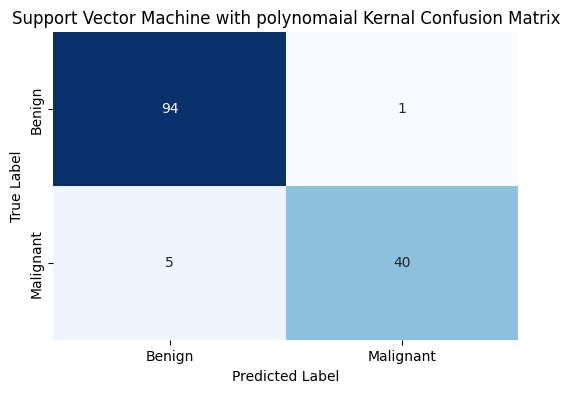

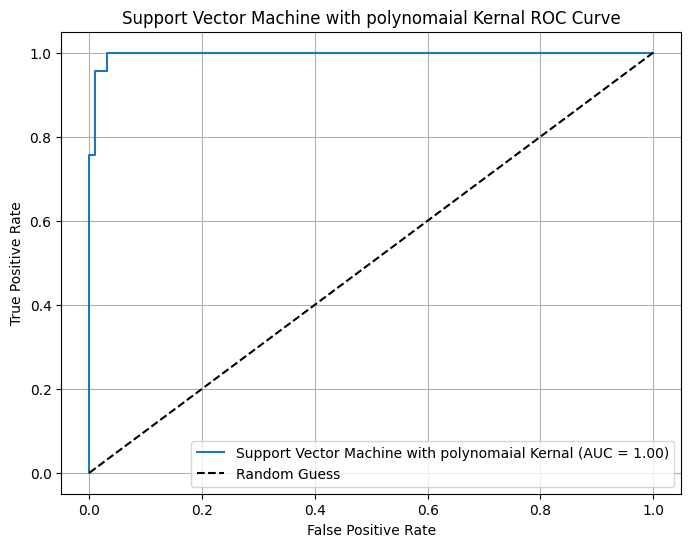

Support Vector Machine with polynomaial Kernal Training Time: 0.01 seconds
Support Vector Machine with polynomaial Kernal Testing Time: 0.01 seconds
 NuSVC Accuracy: 0.96
 NuSVC Precision: 0.98
 NuSVC Recall: 0.96
 NuSVC F1-Score: 0.97
 NuSVC ROC AUC: 1.00
 NuSVC Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.91      0.96      0.93        45

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



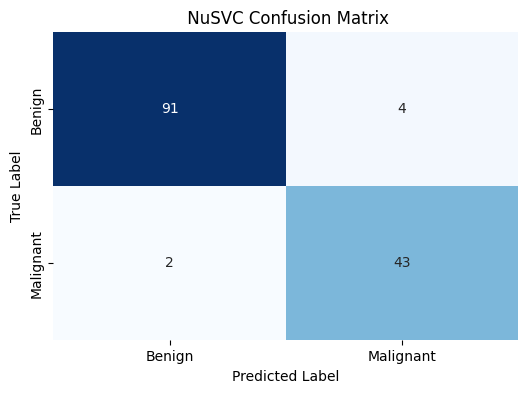

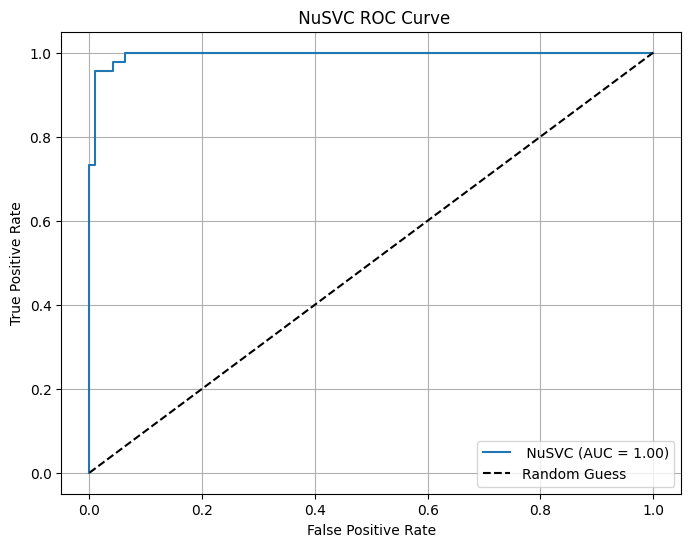

 NuSVC Training Time: 0.04 seconds
 NuSVC Testing Time: 0.01 seconds
K-Nearest Neighbors Accuracy: 0.97
K-Nearest Neighbors Precision: 0.97
K-Nearest Neighbors Recall: 0.99
K-Nearest Neighbors F1-Score: 0.98
K-Nearest Neighbors ROC AUC: 1.00
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



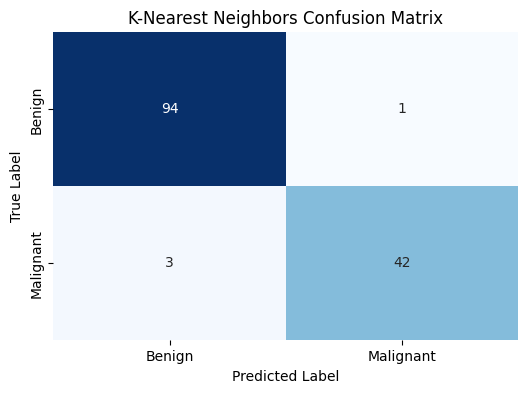

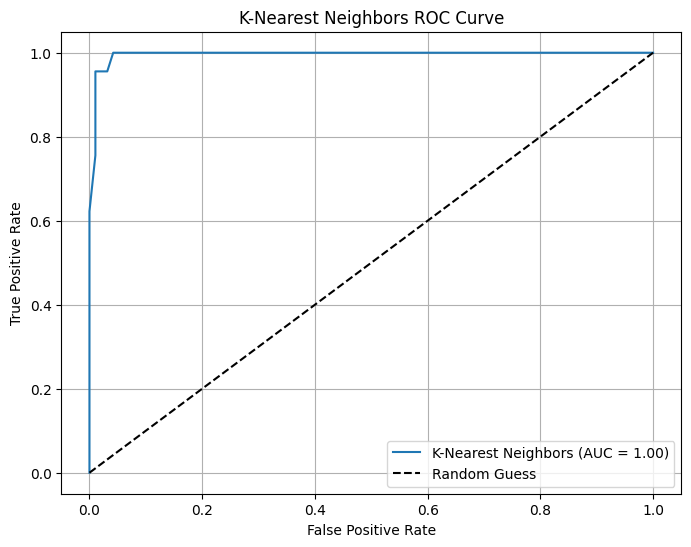

K-Nearest Neighbors Training Time: 0.00 seconds
K-Nearest Neighbors Testing Time: 0.02 seconds


In [ ]:

# Step 3: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Track training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Track testing time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=0)
    print(f'{model_name} Precision: {precision:.2f}')
    print(f'{model_name} Recall: {recall:.2f}')
    print(f'{model_name} F1-Score: {f1:.2f}')

    # ROC AUC Score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'{model_name} ROC AUC: {roc_auc:.2f}')

    # Classification Report
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Print training and testing times
    print(f'{model_name} Training Time: {training_time:.2f} seconds')
    print(f'{model_name} Testing Time: {testing_time:.2f} seconds')

# **Data Balancing**

In [ ]:

from imblearn.over_sampling import SMOTE

In [ ]:

# Step 3: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
Class
0    458
1    458
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

## **Model Evalution**

Logistic Regression Accuracy: 0.97
Logistic Regression Precision: 0.97
Logistic Regression Recall: 0.98
Logistic Regression F1-Score: 0.97
Logistic Regression ROC AUC: 1.00
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.98      0.97      0.97        91

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



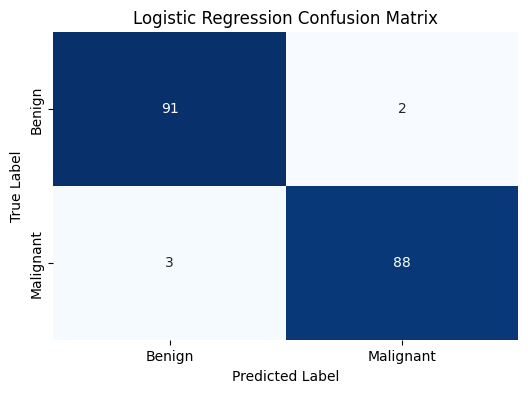

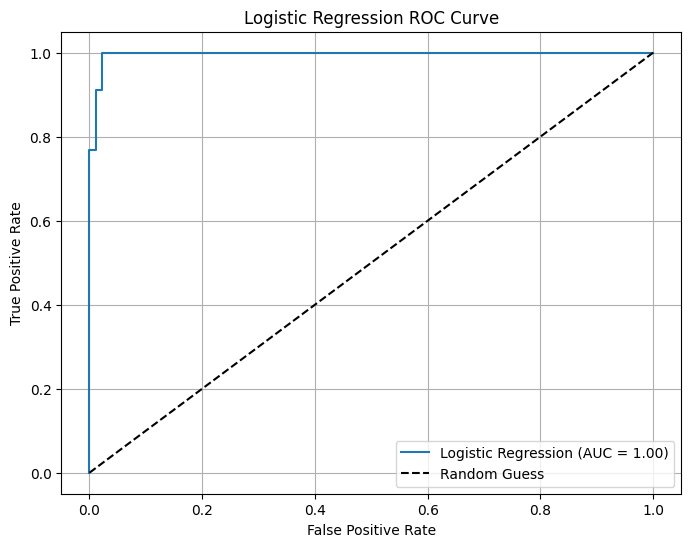

Logistic Regression Training Time: 0.03 seconds
Logistic Regression Testing Time: 0.00 seconds
Decision Tree Accuracy: 0.91
Decision Tree Precision: 0.91
Decision Tree Recall: 0.91
Decision Tree F1-Score: 0.91
Decision Tree ROC AUC: 0.93
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        93
           1       0.91      0.91      0.91        91

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



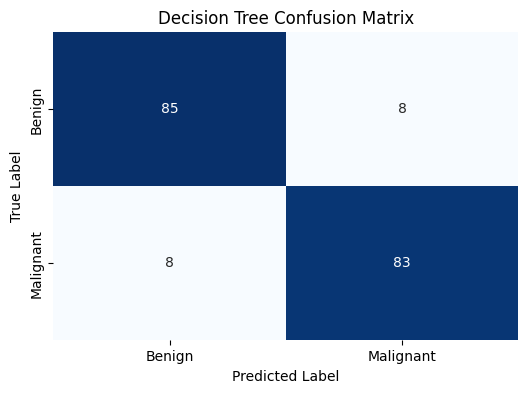

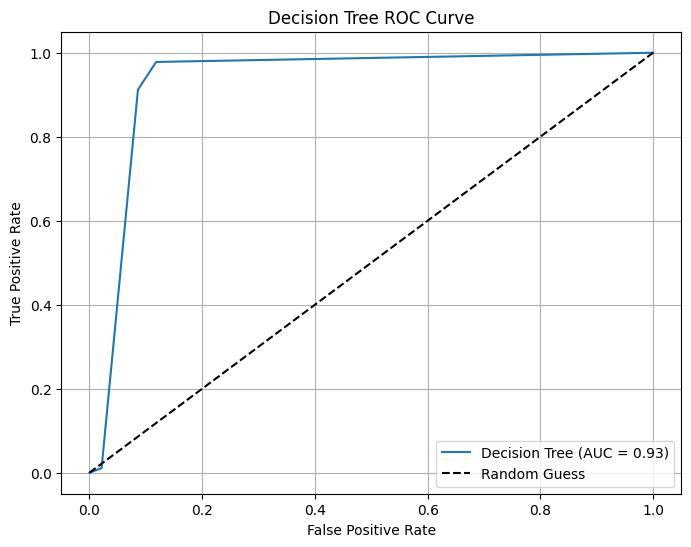

Decision Tree Training Time: 0.00 seconds
Decision Tree Testing Time: 0.00 seconds
Random Forest Accuracy: 0.96
Random Forest Precision: 0.99
Random Forest Recall: 0.94
Random Forest F1-Score: 0.96
Random Forest ROC AUC: 0.98
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        93
           1       0.94      0.99      0.96        91

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184



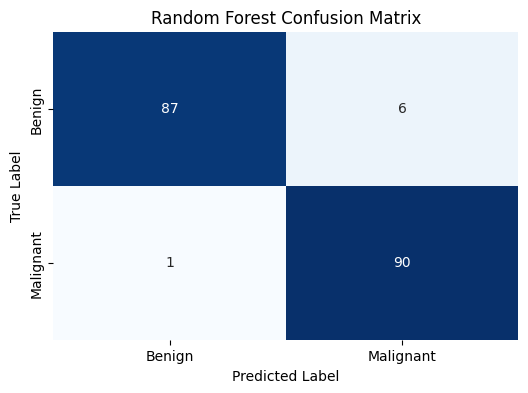

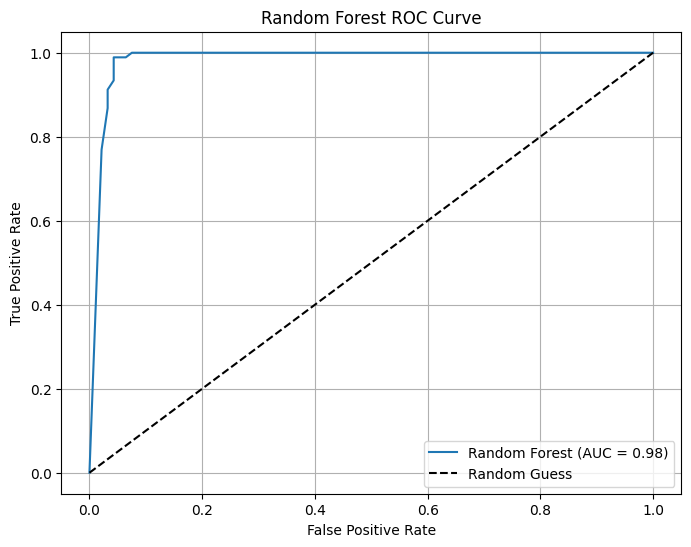

Random Forest Training Time: 0.04 seconds
Random Forest Testing Time: 0.00 seconds
Support Vector Machine with Linear Kernal Accuracy: 0.98
Support Vector Machine with Linear Kernal Precision: 0.99
Support Vector Machine with Linear Kernal Recall: 0.97
Support Vector Machine with Linear Kernal F1-Score: 0.98
Support Vector Machine with Linear Kernal ROC AUC: 1.00
Support Vector Machine with Linear Kernal Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.97      0.99      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



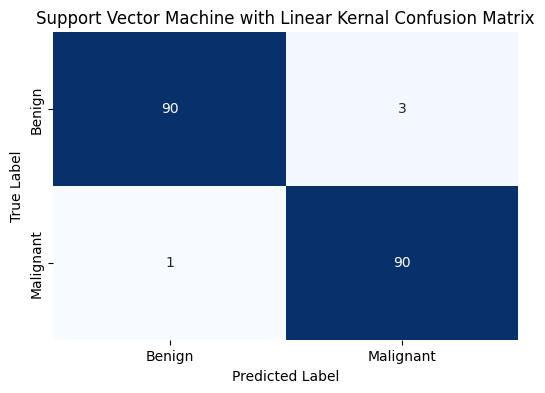

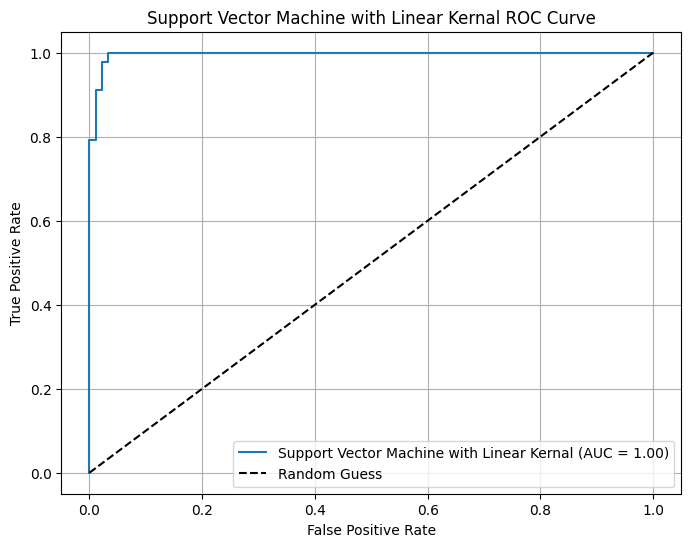

Support Vector Machine with Linear Kernal Training Time: 0.02 seconds
Support Vector Machine with Linear Kernal Testing Time: 0.00 seconds
Support Vector Machine with polynomaial Kernal Accuracy: 0.97
Support Vector Machine with polynomaial Kernal Precision: 0.96
Support Vector Machine with polynomaial Kernal Recall: 0.98
Support Vector Machine with polynomaial Kernal F1-Score: 0.97
Support Vector Machine with polynomaial Kernal ROC AUC: 1.00
Support Vector Machine with polynomaial Kernal Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.98      0.96      0.97        91

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



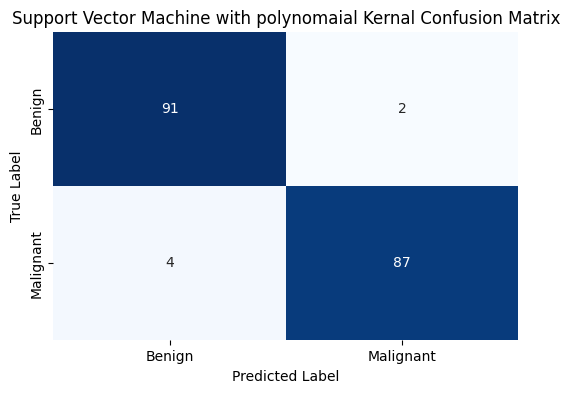

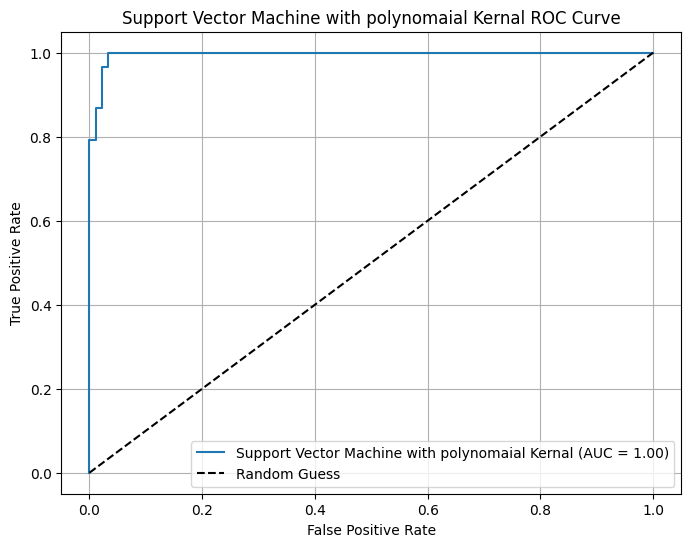

Support Vector Machine with polynomaial Kernal Training Time: 0.01 seconds
Support Vector Machine with polynomaial Kernal Testing Time: 0.00 seconds
 NuSVC Accuracy: 0.98
 NuSVC Precision: 0.99
 NuSVC Recall: 0.98
 NuSVC F1-Score: 0.98
 NuSVC ROC AUC: 1.00
 NuSVC Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



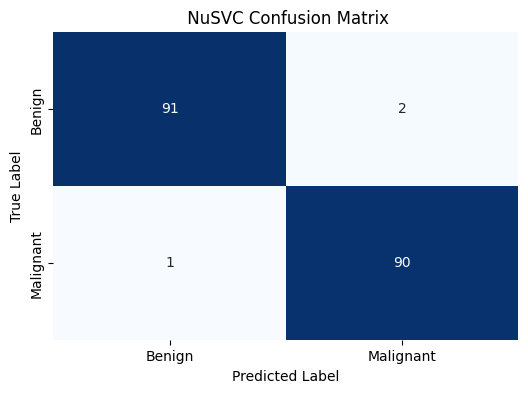

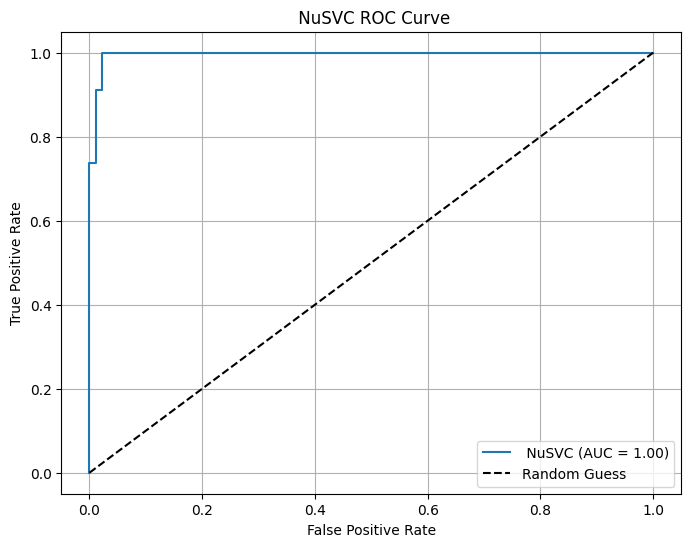

 NuSVC Training Time: 0.03 seconds
 NuSVC Testing Time: 0.01 seconds
K-Nearest Neighbors Accuracy: 0.98
K-Nearest Neighbors Precision: 0.99
K-Nearest Neighbors Recall: 0.98
K-Nearest Neighbors F1-Score: 0.98
K-Nearest Neighbors ROC AUC: 1.00
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



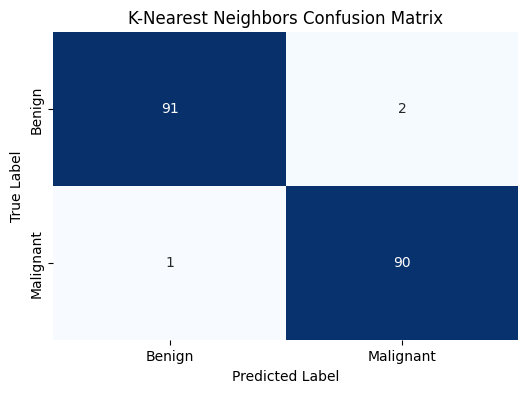

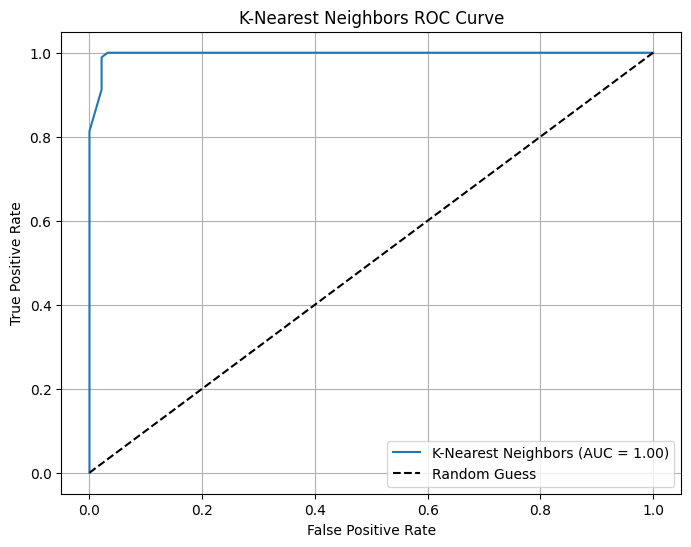

K-Nearest Neighbors Training Time: 0.00 seconds
K-Nearest Neighbors Testing Time: 0.03 seconds


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Step 3: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Track training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Track testing time
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=0)
    print(f'{model_name} Precision: {precision:.2f}')
    print(f'{model_name} Recall: {recall:.2f}')
    print(f'{model_name} F1-Score: {f1:.2f}')

    # ROC AUC Score
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f'{model_name} ROC AUC: {roc_auc:.2f}')

    # Classification Report
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Print training and testing times
    print(f'{model_name} Training Time: {training_time:.2f} seconds')
    print(f'{model_name} Testing Time: {testing_time:.2f} seconds')

# **Kfold**

In [ ]:
from sklearn.svm import NuSVC
models = {
    'Logistic Regression': LogisticRegression(C=0.01),  # High regularization, low iterations
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=10),  # Limited depth, high split min
    'Random Forest': RandomForestClassifier(n_estimators=5, max_depth=2),  # Fewer trees, limited depth
    'Support Vector Machine with Linear Kernal': SVC(kernel='linear', C=0.1),  # Linear kernel with high regularization
    'Support Vector Machine with polynomaial Kernal': SVC(kernel='poly', C=0.1),
    ' NuSVC': NuSVC(),

    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=20)  # High k value for excessive smoothing
}
for model_name, model in models.items():
  print(model_name)
  scores = cross_val_score(model, X, y, cv=10)
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


Logistic Regression
0.96 accuracy with a standard deviation of 0.04
Decision Tree
0.93 accuracy with a standard deviation of 0.03
Random Forest
0.95 accuracy with a standard deviation of 0.03
Support Vector Machine with Linear Kernal
0.97 accuracy with a standard deviation of 0.03
Support Vector Machine with polynomaial Kernal
0.96 accuracy with a standard deviation of 0.03
 NuSVC
0.97 accuracy with a standard deviation of 0.03
K-Nearest Neighbors
0.96 accuracy with a standard deviation of 0.04


# **Feature Importance Analsis**

In [16]:
# Assuming you have X (features) and y (target) dataframes
feature_importances = {}
original_features = list(X.columns)  # Get a list of all feature names
for feature in original_features:
    # Create a copy of the features without the current feature
    X_subset = X.drop(columns=[feature])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Create and train your model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    feature_importances[feature] = accuracy

# Print the feature importances
for feature, accuracy in feature_importances.items():
    print(f"Feature: {feature}, Accuracy without feature: {accuracy}")

Feature: Clump_thickness, Accuracy without feature: 0.95
Feature: Uniformity_of_cell_size, Accuracy without feature: 0.9571428571428572
Feature: Uniformity_of_cell_shape, Accuracy without feature: 0.9642857142857143
Feature: Marginal_adhesion, Accuracy without feature: 0.9642857142857143
Feature: Single_epithelial_cell_size, Accuracy without feature: 0.9642857142857143
Feature: Bare_nuclei, Accuracy without feature: 0.9571428571428572
Feature: Bland_chromatin, Accuracy without feature: 0.95
Feature: Normal_nucleoli, Accuracy without feature: 0.9571428571428572
Feature: Mitoses, Accuracy without feature: 0.9571428571428572


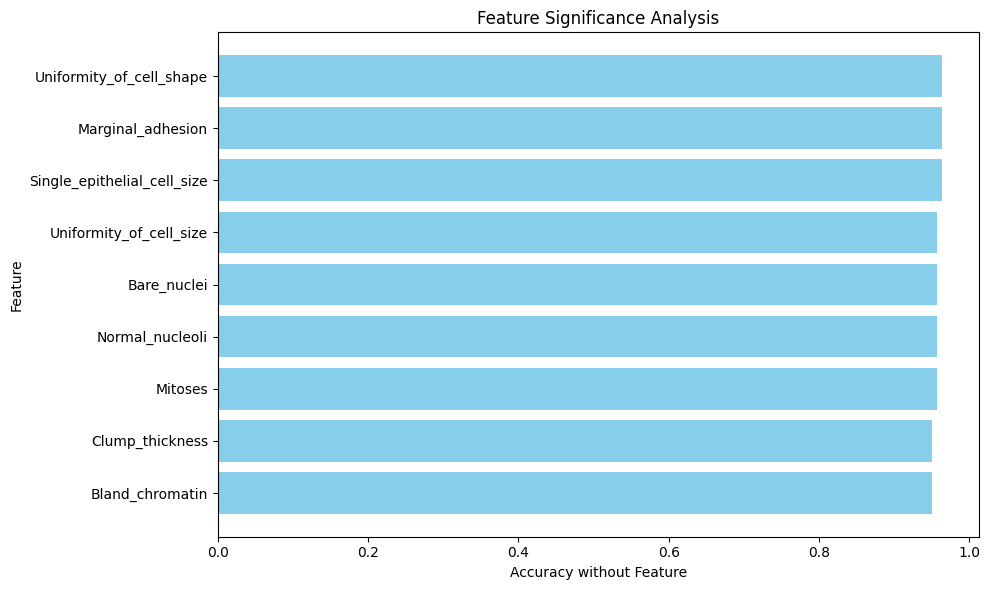

In [17]:
import matplotlib.pyplot as plt

# Sort feature importances by accuracy (descending)
sorted_importances = sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)

# Extract feature names and accuracies
features = [item[0] for item in sorted_importances]
accuracies = [item[1] for item in sorted_importances]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(features, accuracies, color='skyblue')  # Horizontal bar plot
plt.xlabel('Accuracy without Feature')
plt.ylabel('Feature')
plt.title('Feature Significance Analysis')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Create a pandas DataFrame from the feature_importances dictionary
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Accuracy without Feature'])

# Sort the DataFrame by accuracy in descending order
feature_importance_df = feature_importance_df.sort_values(by=['Accuracy without Feature'], ascending=False)

# Display the table
print(feature_importance_df)

                       Feature  Accuracy without Feature
2     Uniformity_of_cell_shape                  0.964286
3            Marginal_adhesion                  0.964286
4  Single_epithelial_cell_size                  0.964286
1      Uniformity_of_cell_size                  0.957143
5                  Bare_nuclei                  0.957143
7              Normal_nucleoli                  0.957143
8                      Mitoses                  0.957143
0              Clump_thickness                  0.950000
6              Bland_chromatin                  0.950000
